<a href="https://colab.research.google.com/github/karolinablaszka/Project-ML/blob/EDA/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from time import time
from sklearn import metrics
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [2]:
df = pd.read_csv(r'C:/Users/karol/data_ML/train_data.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,304.361,-436.590,-33854.769,-96571.569,-15086.947,-794.409,-442.859,304.248,-202.411,-506.852,...,95.294,-3.936,-251.812,256.429,-473.661,-1398.604,42.638,771.185,-191.123,1356.137
1,54.047,90.087,-154.747,-4116.486,38365.133,-589.309,1115.367,274.199,814.953,167.272,...,-176.341,-426.238,-542.428,99.147,-102.309,-277.948,-98.859,-1163.779,265.231,-992.056
2,272.168,-201.736,4212.592,-9123.655,-35422.458,-1029.249,-506.290,-476.856,-570.731,-161.288,...,321.426,-376.033,142.834,920.958,-122.525,-174.304,-137.612,-1571.473,678.323,1020.263
3,170.007,68.736,48662.079,29735.235,-13903.955,895.081,-257.748,-811.058,-691.561,-31.439,...,-409.919,400.946,313.270,123.172,1786.962,147.637,31.433,-784.719,573.433,1454.415
4,86.797,180.052,-49643.545,2515.406,26206.315,-407.453,-189.416,-53.664,-159.507,-42.291,...,-101.761,-424.898,37.254,-337.431,423.691,14.240,267.352,-234.560,-213.804,873.391


In [4]:
#reducing memory usage
for col in df.columns:
    if df[col].dtype == 'float64': df[col] = df[col].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Columns: 10000 entries, 0 to 9999
dtypes: float32(10000)
memory usage: 143.1 MB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,...,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,30.644131,9.080950,169.679260,811.083191,-186.008530,25.717754,24.918102,19.061264,14.826001,14.970469,...,13.997373,21.456600,22.586428,16.736876,13.992188,-1.426349,9.597249,-2.031242,-2.841234,38.071922
std,286.172302,213.166672,43665.007812,57123.441406,21942.472656,711.556213,898.109253,868.676208,532.727600,236.749298,...,269.223328,545.746094,265.221313,503.416199,818.825134,655.665894,204.731567,793.022278,629.128662,768.405762
min,-989.450012,-859.921997,-163336.421875,-243844.625000,-77566.109375,-2414.196045,-3227.680908,-3151.321045,-1792.781006,-794.270996,...,-957.937012,-1983.009033,-937.356995,-1758.858032,-2526.791016,-2165.769043,-739.205017,-2731.037109,-2223.908936,-2565.512939
25%,-163.781750,-135.343498,-29284.120117,-38028.428711,-14426.799805,-448.696747,-590.170242,-562.956482,-349.689751,-144.157753,...,-169.777252,-352.959496,-154.639755,-328.083755,-550.598999,-432.000740,-129.076252,-561.303986,-424.192757,-462.827995
50%,35.478500,2.680500,1181.698486,980.588013,-154.834999,13.931500,13.674000,16.750501,9.731000,11.159500,...,18.700001,38.348499,26.199500,14.575500,1.363500,-3.796500,8.600500,-4.243000,-7.628000,28.107000
75%,215.780506,156.095749,29630.914062,40561.958984,14515.833252,506.893257,630.490738,608.697998,383.110489,179.768253,...,196.049004,396.868500,198.237247,356.185501,574.453247,425.338005,149.855755,539.550003,427.794510,552.173508
max,1224.394043,722.867981,177744.234375,215372.859375,86287.953125,2446.466064,3118.086914,2966.970947,1914.307983,803.200012,...,893.195984,2080.750000,1070.453003,1705.663940,2868.989014,2562.331055,685.176025,3123.616943,2204.527100,2664.073975


In [6]:
df.isnull().sum().sum() 

0

In [7]:
df.isnull().sum().sort_values()

0       0
6663    0
6664    0
6665    0
6666    0
       ..
3334    0
3335    0
3336    0
3329    0
9999    0
Length: 10000, dtype: int64

In [8]:
df.dropna(axis=1, how='any', inplace=True)

In [9]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [10]:
df.shape

(3750, 10000)

In [11]:
def missing():
    missing = [(c, df[c].isna().mean()*100) for c in df]
    missing = pd.DataFrame(missing, columns=["feature", "percentage"])
    missing = missing[missing.percentage > 0]
    print(missing.sort_values("percentage", ascending=False))
missing()

Empty DataFrame
Columns: [feature, percentage]
Index: []


In [12]:
from scipy.stats import zscore as zscore_outlier
def outliers_2(df):
    Q1, Q3 = np.percentile(df, [10, 90])
    IQR = Q3 - Q1
    return (df < (Q1 - 1.5 * IQR))&(df > (Q3 + 1.5 * IQR))
    

In [13]:
from typing import Dict, Callable
def outliers(df_copy: pd.DataFrame, outliers_methods_dict: Dict[str, Callable]):
    for method_name, method in outliers_methods_dict.items():
        df = df_copy.copy()

        print('\nOutliers:\n', df.apply(lambda x: method(x)).sum(), '\n')

        df = df[df.apply(lambda x: ~method(x))].dropna()
        print(df.shape)

def outliers_results():
    outliers_methods_dict = {
        "outliers_2": outliers_2
        }
    outliers(df, outliers_methods_dict)
#if __name__ == '__main__':
outliers_results()



Outliers:
 0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int64 

(3750, 10000)


In [14]:
from sklearn import preprocessing
np.random.seed(1)
scaler = preprocessing.StandardScaler()
df_scaler = scaler.fit_transform(df)
df_scaler

array([[ 0.9566029 , -2.0909948 , -0.77931947, ...,  0.9751545 ,
        -0.29931378,  1.7155532 ],
       [ 0.08178981,  0.3800634 , -0.00743089, ..., -1.4651575 ,
         0.42615765, -1.340783  ],
       [ 0.8440928 , -0.989109  ,  0.09260165, ..., -1.9793276 ,
         1.082855  ,  1.2783898 ],
       ...,
       [ 0.21857524, -0.7711847 , -0.38308582, ...,  1.0085427 ,
        -0.45518026, -2.685843  ],
       [ 2.888231  ,  0.41804346, -0.90701205, ...,  0.6999541 ,
         0.49753416,  0.21998097],
       [-0.69910586,  0.5545464 , -0.56875694, ..., -1.0581614 ,
        -1.5437195 , -1.0949087 ]], dtype=float32)

In [15]:
df.shape

(3750, 10000)

In [16]:
#corr_matrix = df.corr().abs()
#print("corr matrix", corr_matrix)

In [17]:
# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(corr_matrix, k=1).astype(np.bool))
#print("upper triangle", upper)

# Find index of feature columns with correlation greater than 0.80
#to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
#to_drop

# Drop features
#df.drop(df.columns[to_drop], axis=1)
#df.shape

In [41]:
#PCA + scatterplot

import seaborn as sns
pca = PCA(n_components=2, random_state=1)
# fit on all numerical features and reduce dimensionality to two dimensions
cols = df.columns
pipe = make_pipeline(StandardScaler())
df_std = pipe.fit_transform(df[cols].values)
data_pca = pca.fit_transform(df_std)


# get percentage of retained variance after dimensionality reduction
ex_variance = pca.explained_variance_ratio_.sum()*100
print(f"The reduced 2-dimensional data still contains {ex_variance:.1f}% of the variance of the original data.")



The reduced 2-dimensional data still contains 0.1% of the variance of the original data.


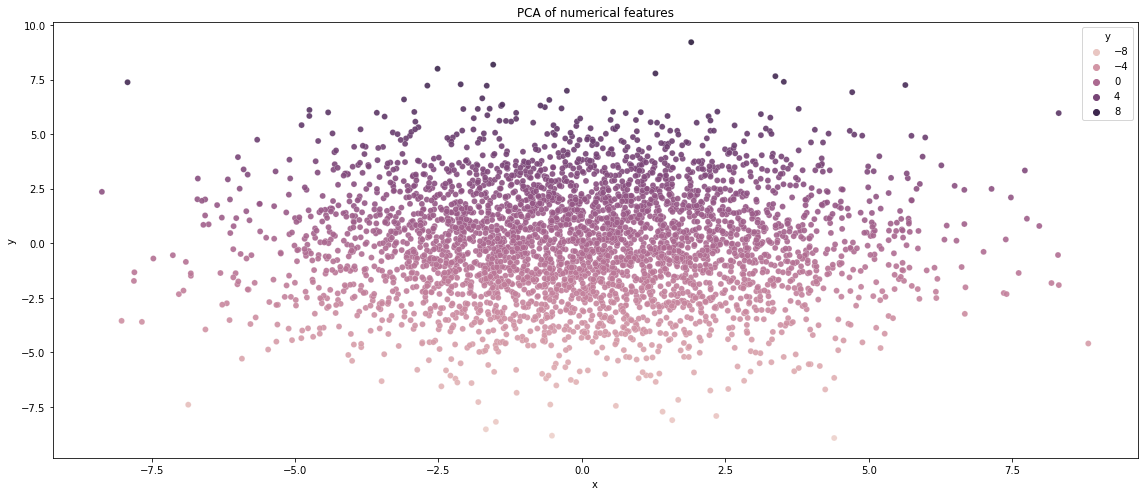

In [42]:
data_pca = pd.DataFrame(data_pca, columns=["x", "y"])
data_pca = data_pca.join(df)
plt.figure(figsize=(16,7))
sns.scatterplot(x="x", y="y", data=data_pca, hue="y", linewidth=0.2, alpha=0.9)
plt.title(f"PCA of numerical features")
plt.tight_layout()
plt.show()

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, learning_rate='auto',
                   init='random')
pca = PCA(n_components=0.99)
pipeline = Pipeline([('pca', pca), ('tsne', tsne)])
pca_tsne_results = pipeline.fit_transform(df.values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3750 samples in 0.136s...
[t-SNE] Computed neighbors for 3750 samples in 1.265s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3750
[t-SNE] Computed conditional probabilities for sample 2000 / 3750
[t-SNE] Computed conditional probabilities for sample 3000 / 3750
[t-SNE] Computed conditional probabilities for sample 3750 / 3750
[t-SNE] Mean sigma: 22845.082632
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.206268
[t-SNE] KL divergence after 300 iterations: 2.078736


<AxesSubplot:xlabel='pca_tsne-2d-one', ylabel='pca_tsne-2d-two'>

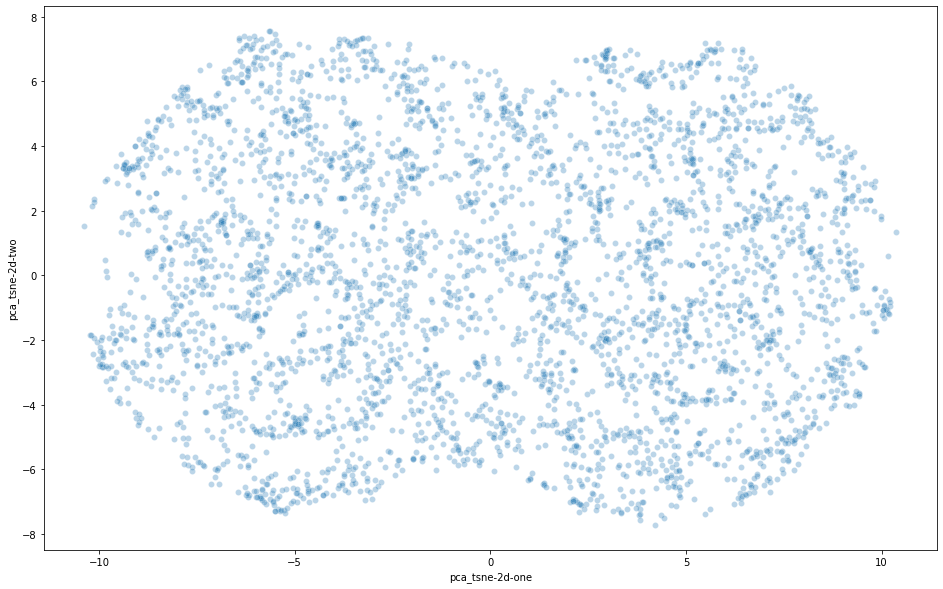

In [46]:
df['pca_tsne-2d-one'] = pca_tsne_results[:,0]
df['pca_tsne-2d-two'] = pca_tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca_tsne-2d-one", y="pca_tsne-2d-two",
    #hue="x",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)